In [1]:
import numpy as np
import numba 
import math
import time
import cv2 as cv2
import matplotlib.pyplot as plt

charge=[x,y,c]

In [2]:
X=0
Y=1
C=2
TIMESCALE=1
E0=1

In [3]:
def compute_force(c1,c2):

    c_dir=c1[C]*c2[C]
    dist=np.sqrt(np.square(c1[X]-c2[X])+np.square(c1[Y]-c2[Y]))
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*np.square(dist)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec


In [4]:
%timeit compute_force([1,0,1],[-1,0,1])

3.67 µs ± 92.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


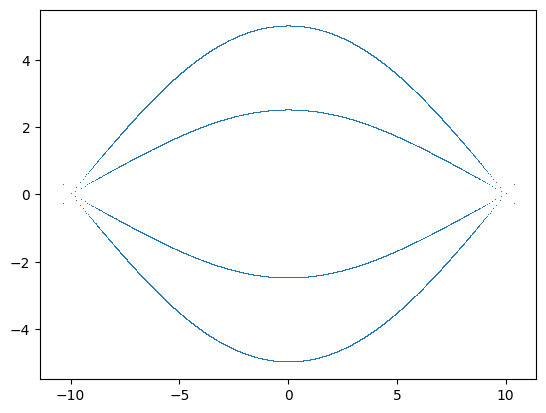

array([[-1.13882007e-03,  5.00000000e+00, -1.00000000e+00],
       [-2.27764016e-03,  4.99999984e+00, -1.00000000e+00],
       [-3.41646032e-03,  4.99999953e+00, -1.00000000e+00],
       ...,
       [ 9.79417026e+00, -7.46230567e-02,  1.00000000e+00],
       [-1.00000000e+01,  0.00000000e+00, -1.00000000e+00],
       [ 1.00000000e+01,  0.00000000e+00,  1.00000000e+00]])

In [5]:
lst=[]
testcharge=[0,5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,-1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,2.5,1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## underside
testcharge=[0,-5,-1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-5,1]
for i in range(4630):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-2.5,-1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
testcharge=[0,-2.5,1]
for i in range(3364):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],testcharge[C]]
    
   
    lst.append(testcharge)
## plot

lst.append([-10,0,-1])
lst.append([10,0,1])
lst=np.array(lst)
plt.plot(lst[:,0], lst[:,1],",")
plt.show()
lst

Numba Implementation(slow and wrong)

In [6]:

@numba.vectorize(["float64(float64,float64,float64,float64,float64,float64)"])
def compute_forces(c1,c2,x1,x2,y1,y2):
    c_dir=c1*c2
    dist=(((x1-x2)**2)+((y1-y2)**2))**.5
    dir_vec=[x1-x2,y1-y2]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*(dist**2)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec[0]

In [7]:
compute_forces.ufunc.types

['dddddd->d']

In [8]:
test=np.random.random((6,100000))


%timeit compute_forces(*test)

24.9 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Numba (fast)

In [97]:
from numba import float64
@numba.guvectorize([(float64[:],float64[:],float64[:])], '(n),(n)->(n)')
def compute_force_guv(c1,c2,res):
    c_dir=c1[C]*c2[C]
    dist=((c1[X]-c2[X])**2+(c1[Y]-c2[Y])**2)**.5
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*(dist**2)*E0))*TIMESCALE*c_dir
    res[:]=[norm_vec[X]*return_const,norm_vec[Y]*return_const,0]
    #print(res)

In [23]:
test=np.random.random((3,2,100))


%timeit compute_force_guv(*test)

2.25 µs ± 254 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [54]:
compute_force_guv.ufunc.signature

'(n),(n)->(n)'

In [228]:
test2=np.array([[[1,1,1],[2,2,2]]],dtype="float64")
res=np.zeros((2,3))
def compute_vectors_guv_fixed_output(non_statics,statics):
    return compute_force_guv(non_statics,statics,np.zeros((statics.shape[0],3)))[:2,:2]

compute_vectors_guv_fixed_output(np.array([[0,0,1],[0,0,1]]),np.array([[1,1,1],[1,1,-1]]))

array([[-0.02813488, -0.02813488],
       [ 0.02813488,  0.02813488]])

In [ ]:
stationary_charges=[]
